In [27]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, f1_score, mean_absolute_error
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, CondensedNearestNeighbour, OneSidedSelection, NeighbourhoodCleaningRule
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

RAND = 13

# Data Preparation

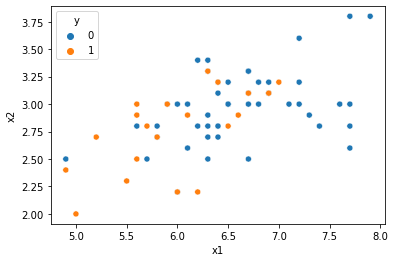

In [2]:
iris = datasets.load_iris(as_frame=True).frame
df = iris[['sepal length (cm)', 'sepal width (cm)', 'target']]
df.columns = ['x1', 'x2', 'y']
df = df.loc[df['y'] > 0]
df.loc[df['y']==2,'y'] = 0
df = pd.concat([df[df['y']==0], df[df['y']==1].iloc[:20]]).reset_index(drop=True)
train, test = train_test_split(df, test_size=0.2, random_state=RAND)
sns.scatterplot(x='x1', y='x2', data=df, hue='y')
plt.show()

In [3]:
model = LogisticRegression(penalty='none')
model.fit(train[['x1', 'x2']], train['y'])
pred_test = model.predict(test[['x1', 'x2']])
pred_train = model.predict(train[['x1', 'x2']])
test_score = model.predict_proba(test[['x1', 'x2']])[:,1]
train_score = model.predict_proba(train[['x1', 'x2']])[:,1]

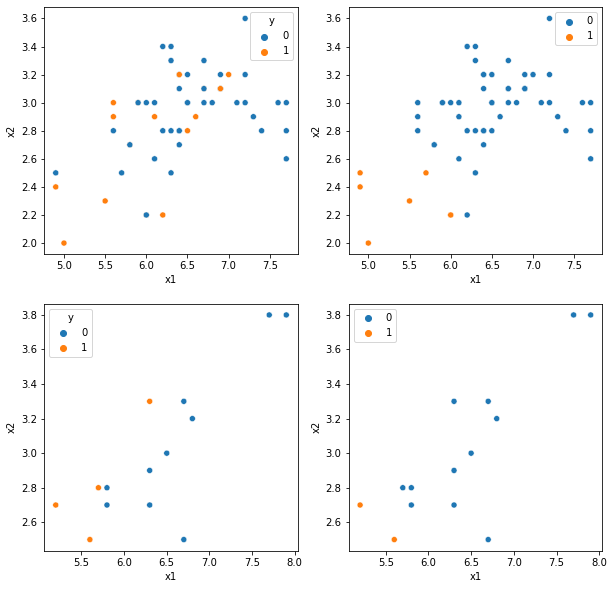

In [4]:
fig,ax = plt.subplots(2,2, figsize=(10,10))
sns.scatterplot(x='x1', y='x2', data=train, hue='y', ax=ax[0,0])
sns.scatterplot(x='x1', y='x2', data=train, hue=pred_train, ax=ax[0,1])
sns.scatterplot(x='x1', y='x2', data=test, hue='y', ax=ax[1,0])
sns.scatterplot(x='x1', y='x2', data=test, hue=pred_test, ax=ax[1,1])
plt.show()

In [5]:
evals_df = pd.DataFrame([['None', 
                           mean_absolute_error(train['y'], train_score),
                           f1_score(train['y'].astype('float64'), pred_train), 
                           mean_absolute_error(test['y'], test_score), 
                           f1_score(test['y'], pred_test)]], 
                        columns=['Method', 'Train MAE', 'Train f1', 'Test MAE', 'Test f1'])
evals_df

,Method,Train MAE,Train f1,Test MAE,Test f1
0,None,0.34714,0.347826,0.320526,0.666667


# Undersampling
### Random Undersampling

In [6]:
sampler = RandomUnderSampler(random_state=RAND)
X_sampled, y_sampled = sampler.fit_resample(train[['x1', 'x2']], train['y'])
sampled_df = pd.concat([X_sampled, y_sampled], axis=1)

In [7]:
model = LogisticRegression(penalty='none')
model.fit(sampled_df[['x1', 'x2']], sampled_df['y'])
pred_test = model.predict(test[['x1', 'x2']])
pred_train = model.predict(sampled_df[['x1', 'x2']])
test_score = model.predict_proba(test[['x1', 'x2']])[:,1]
train_score = model.predict_proba(sampled_df[['x1', 'x2']])[:,1]

evals_df = pd.concat([evals_df, 
                      pd.DataFrame([['Random Undersampling', 
                                     mean_absolute_error(sampled_df['y'], train_score),
                                     f1_score(sampled_df['y'].astype('float64'), pred_train), 
                                     mean_absolute_error(test['y'], test_score), 
                                     f1_score(test['y'], pred_test)]], 
                                   columns=evals_df.columns)])

evals_df

,Method,Train MAE,Train f1,Test MAE,Test f1
0,None,0.347140,0.347826,0.320526,0.666667
0,Random Undersampling,0.386741,0.666667,0.387535,0.666667


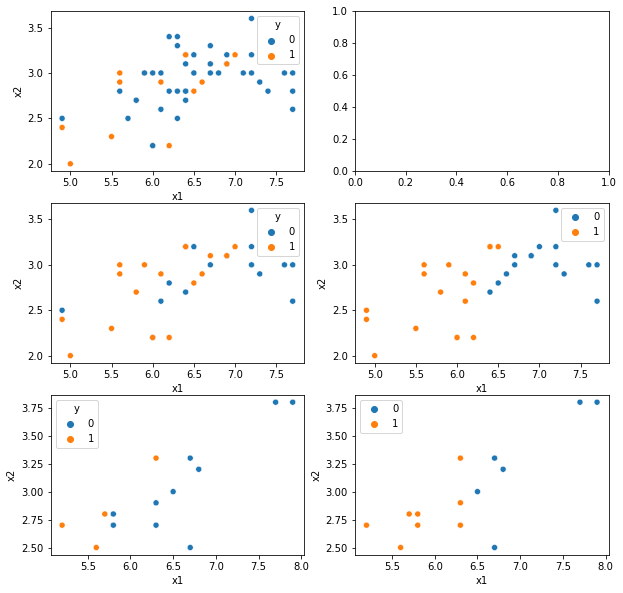

In [8]:
fig,ax = plt.subplots(3,2, figsize=(10,10))
sns.scatterplot(x='x1', y='x2', data=train, hue='y', ax=ax[0,0])
sns.scatterplot(x='x1', y='x2', data=sampled_df, hue='y', ax=ax[1,0])
sns.scatterplot(x='x1', y='x2', data=sampled_df, hue=pred_train, ax=ax[1,1])
sns.scatterplot(x='x1', y='x2', data=test, hue='y', ax=ax[2,0])
sns.scatterplot(x='x1', y='x2', data=test, hue=pred_test, ax=ax[2,1])
plt.show()

### Tomek Links

In [9]:
sampler = TomekLinks()
X_sampled, y_sampled = sampler.fit_resample(train[['x1', 'x2']], train['y'])
sampled_df = pd.concat([X_sampled, y_sampled], axis=1)

In [10]:
model = LogisticRegression(penalty='none')
model.fit(sampled_df[['x1', 'x2']], sampled_df['y'])
pred_test = model.predict(test[['x1', 'x2']])
pred_train = model.predict(sampled_df[['x1', 'x2']])
test_score = model.predict_proba(test[['x1', 'x2']])[:,1]
train_score = model.predict_proba(sampled_df[['x1', 'x2']])[:,1]

evals_df = pd.concat([evals_df, 
                      pd.DataFrame([['Tomek Links', 
                                     mean_absolute_error(sampled_df['y'], train_score),
                                     f1_score(sampled_df['y'].astype('float64'), pred_train), 
                                     mean_absolute_error(test['y'], test_score), 
                                     f1_score(test['y'], pred_test)]], 
                                   columns=evals_df.columns)])

evals_df

,Method,Train MAE,Train f1,Test MAE,Test f1
0,None,0.347140,0.347826,0.320526,0.666667
0,Random Undersampling,0.386741,0.666667,0.387535,0.666667
0,Tomek Links,0.338999,0.518519,0.309594,0.750000


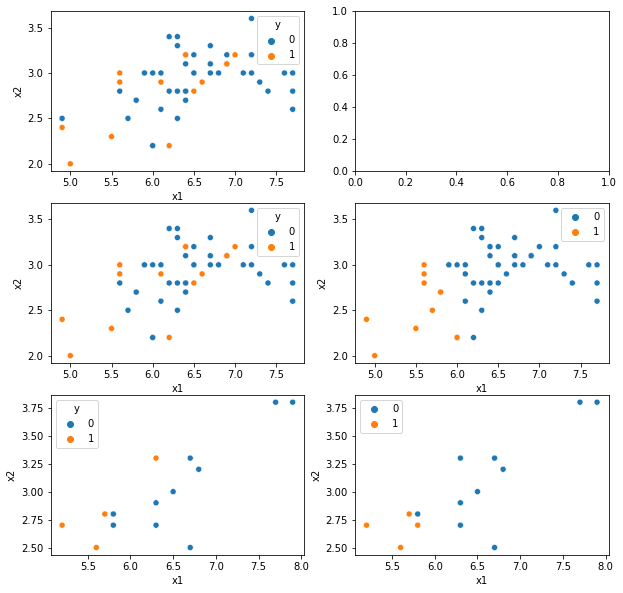

In [11]:
fig,ax = plt.subplots(3,2, figsize=(10,10))
sns.scatterplot(x='x1', y='x2', data=train, hue='y', ax=ax[0,0])
sns.scatterplot(x='x1', y='x2', data=sampled_df, hue='y', ax=ax[1,0])
sns.scatterplot(x='x1', y='x2', data=sampled_df, hue=pred_train, ax=ax[1,1])
sns.scatterplot(x='x1', y='x2', data=test, hue='y', ax=ax[2,0])
sns.scatterplot(x='x1', y='x2', data=test, hue=pred_test, ax=ax[2,1])
plt.show()

### Condensed Nearest Neighbour

In [12]:
sampler = CondensedNearestNeighbour(random_state=RAND)
X_sampled, y_sampled = sampler.fit_resample(train[['x1', 'x2']], train['y'])
sampled_df = pd.concat([X_sampled, y_sampled], axis=1)

In [13]:
model = LogisticRegression(penalty='none')
model.fit(sampled_df[['x1', 'x2']], sampled_df['y'])
pred_test = model.predict(test[['x1', 'x2']])
pred_train = model.predict(sampled_df[['x1', 'x2']])
test_score = model.predict_proba(test[['x1', 'x2']])[:,1]
train_score = model.predict_proba(sampled_df[['x1', 'x2']])[:,1]

evals_df = pd.concat([evals_df, 
                      pd.DataFrame([['Condensed Nearest Neighbour', 
                                     mean_absolute_error(sampled_df['y'], train_score),
                                     f1_score(sampled_df['y'].astype('float64'), pred_train), 
                                     mean_absolute_error(test['y'], test_score), 
                                     f1_score(test['y'], pred_test)]], 
                                   columns=evals_df.columns)])

evals_df

,Method,Train MAE,Train f1,Test MAE,Test f1
0,None,0.347140,0.347826,0.320526,0.666667
0,Random Undersampling,0.386741,0.666667,0.387535,0.666667
0,Tomek Links,0.338999,0.518519,0.309594,0.750000
0,Condensed Nearest Neighbour,0.454197,0.551724,0.394890,0.666667


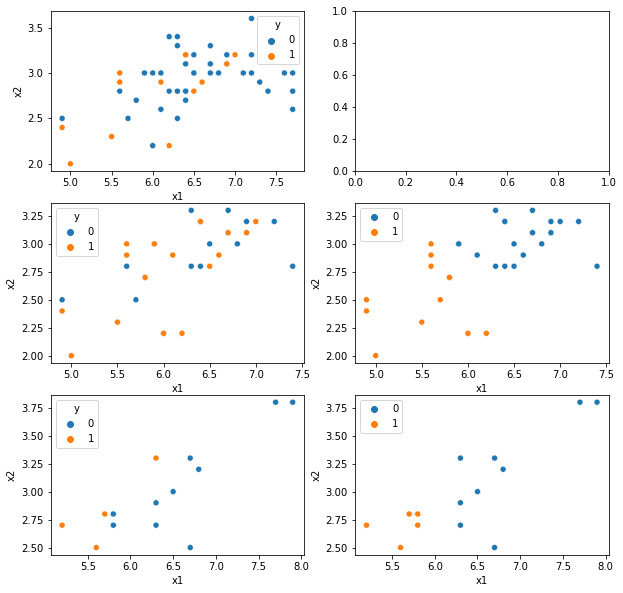

In [14]:
fig,ax = plt.subplots(3,2, figsize=(10,10))
sns.scatterplot(x='x1', y='x2', data=train, hue='y', ax=ax[0,0])
sns.scatterplot(x='x1', y='x2', data=sampled_df, hue='y', ax=ax[1,0])
sns.scatterplot(x='x1', y='x2', data=sampled_df, hue=pred_train, ax=ax[1,1])
sns.scatterplot(x='x1', y='x2', data=test, hue='y', ax=ax[2,0])
sns.scatterplot(x='x1', y='x2', data=test, hue=pred_test, ax=ax[2,1])
plt.show()

### One-side Sampling

In [15]:
sampler = OneSidedSelection(random_state=RAND)
X_sampled, y_sampled = sampler.fit_resample(train[['x1', 'x2']], train['y'])
sampled_df = pd.concat([X_sampled, y_sampled], axis=1)

In [16]:
model = LogisticRegression(penalty='none')
model.fit(sampled_df[['x1', 'x2']], sampled_df['y'])
pred_test = model.predict(test[['x1', 'x2']])
pred_train = model.predict(sampled_df[['x1', 'x2']])
test_score = model.predict_proba(test[['x1', 'x2']])[:,1]
train_score = model.predict_proba(sampled_df[['x1', 'x2']])[:,1]

evals_df = pd.concat([evals_df, 
                      pd.DataFrame([['One-Sided Selection', 
                                     mean_absolute_error(sampled_df['y'], train_score),
                                     f1_score(sampled_df['y'].astype('float64'), pred_train), 
                                     mean_absolute_error(test['y'], test_score), 
                                     f1_score(test['y'], pred_test)]], 
                                   columns=evals_df.columns)])

evals_df

,Method,Train MAE,Train f1,Test MAE,Test f1
0,None,0.347140,0.347826,0.320526,0.666667
0,Random Undersampling,0.386741,0.666667,0.387535,0.666667
0,Tomek Links,0.338999,0.518519,0.309594,0.750000
0,Condensed Nearest Neighbour,0.454197,0.551724,0.394890,0.666667
0,One-Sided Selection,0.338796,0.538462,0.307872,0.666667


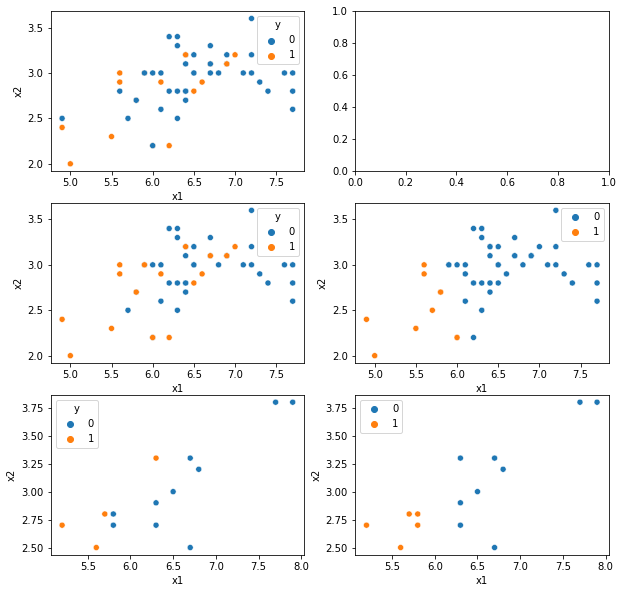

In [17]:
fig,ax = plt.subplots(3,2, figsize=(10,10))
sns.scatterplot(x='x1', y='x2', data=train, hue='y', ax=ax[0,0])
sns.scatterplot(x='x1', y='x2', data=sampled_df, hue='y', ax=ax[1,0])
sns.scatterplot(x='x1', y='x2', data=sampled_df, hue=pred_train, ax=ax[1,1])
sns.scatterplot(x='x1', y='x2', data=test, hue='y', ax=ax[2,0])
sns.scatterplot(x='x1', y='x2', data=test, hue=pred_test, ax=ax[2,1])
plt.show()

### Neighbourhood Cleaning Rule

In [18]:
sampler = NeighbourhoodCleaningRule()
X_sampled, y_sampled = sampler.fit_resample(train[['x1', 'x2']], train['y'])
sampled_df = pd.concat([X_sampled, y_sampled], axis=1)

In [19]:
model = LogisticRegression(penalty='none')
model.fit(sampled_df[['x1', 'x2']], sampled_df['y'])
pred_test = model.predict(test[['x1', 'x2']])
pred_train = model.predict(sampled_df[['x1', 'x2']])
test_score = model.predict_proba(test[['x1', 'x2']])[:,1]
train_score = model.predict_proba(sampled_df[['x1', 'x2']])[:,1]

evals_df = pd.concat([evals_df, 
                      pd.DataFrame([['Neighbourhood Cleaning Rule', 
                                     mean_absolute_error(sampled_df['y'], train_score),
                                     f1_score(sampled_df['y'].astype('float64'), pred_train), 
                                     mean_absolute_error(test['y'], test_score), 
                                     f1_score(test['y'], pred_test)]], 
                                   columns=evals_df.columns)])

evals_df

,Method,Train MAE,Train f1,Test MAE,Test f1
0,None,0.347140,0.347826,0.320526,0.666667
0,Random Undersampling,0.386741,0.666667,0.387535,0.666667
0,Tomek Links,0.338999,0.518519,0.309594,0.750000
0,Condensed Nearest Neighbour,0.454197,0.551724,0.394890,0.666667
0,One-Sided Selection,0.338796,0.538462,0.307872,0.666667
0,Neighbourhood Cleaning Rule,0.236366,0.866667,0.436813,0.461538


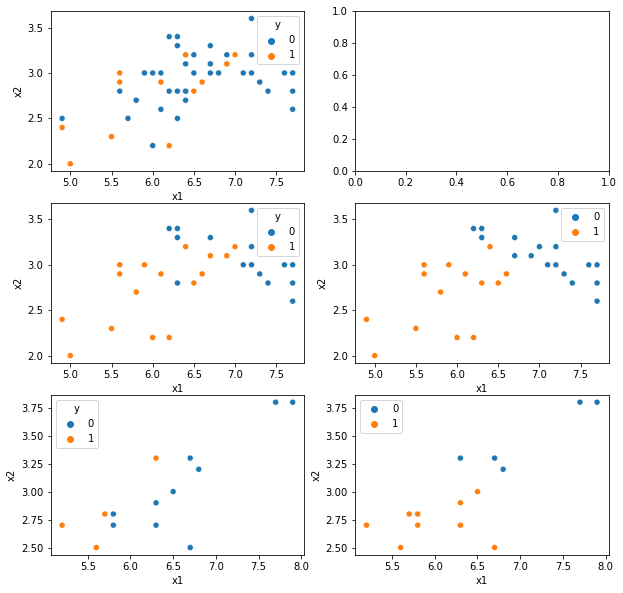

In [20]:
fig,ax = plt.subplots(3,2, figsize=(10,10))
sns.scatterplot(x='x1', y='x2', data=train, hue='y', ax=ax[0,0])
sns.scatterplot(x='x1', y='x2', data=sampled_df, hue='y', ax=ax[1,0])
sns.scatterplot(x='x1', y='x2', data=sampled_df, hue=pred_train, ax=ax[1,1])
sns.scatterplot(x='x1', y='x2', data=test, hue='y', ax=ax[2,0])
sns.scatterplot(x='x1', y='x2', data=test, hue=pred_test, ax=ax[2,1])
plt.show()

# Oversampling
### Random Over Sampler

In [21]:
sampler = RandomOverSampler(random_state=RAND)
X_sampled, y_sampled = sampler.fit_resample(train[['x1', 'x2']], train['y'])
sampled_df = pd.concat([X_sampled, y_sampled], axis=1)

In [22]:
model = LogisticRegression(penalty='none')
model.fit(sampled_df[['x1', 'x2']], sampled_df['y'])
pred_test = model.predict(test[['x1', 'x2']])
pred_train = model.predict(sampled_df[['x1', 'x2']])
test_score = model.predict_proba(test[['x1', 'x2']])[:,1]
train_score = model.predict_proba(sampled_df[['x1', 'x2']])[:,1]

evals_df = pd.concat([evals_df, 
                      pd.DataFrame([['Random Over Sampler', 
                                     mean_absolute_error(sampled_df['y'], train_score),
                                     f1_score(sampled_df['y'].astype('float64'), pred_train), 
                                     mean_absolute_error(test['y'], test_score), 
                                     f1_score(test['y'], pred_test)]], 
                                   columns=evals_df.columns)])

evals_df

,Method,Train MAE,Train f1,Test MAE,Test f1
0,None,0.347140,0.347826,0.320526,0.666667
0,Random Undersampling,0.386741,0.666667,0.387535,0.666667
0,Tomek Links,0.338999,0.518519,0.309594,0.750000
0,Condensed Nearest Neighbour,0.454197,0.551724,0.394890,0.666667
0,One-Sided Selection,0.338796,0.538462,0.307872,0.666667
0,Neighbourhood Cleaning Rule,0.236366,0.866667,0.436813,0.461538
0,Random Over Sampler,0.423196,0.605263,0.386947,0.600000


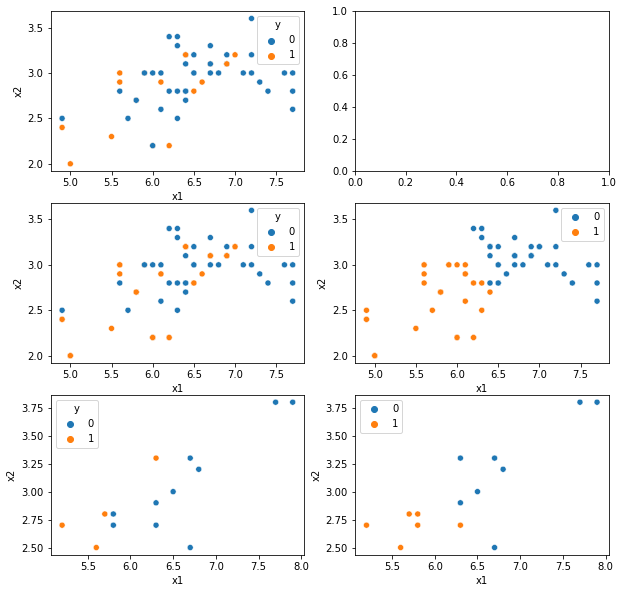

In [23]:
fig,ax = plt.subplots(3,2, figsize=(10,10))
sns.scatterplot(x='x1', y='x2', data=train, hue='y', ax=ax[0,0])
sns.scatterplot(x='x1', y='x2', data=sampled_df, hue='y', ax=ax[1,0])
sns.scatterplot(x='x1', y='x2', data=sampled_df, hue=pred_train, ax=ax[1,1])
sns.scatterplot(x='x1', y='x2', data=test, hue='y', ax=ax[2,0])
sns.scatterplot(x='x1', y='x2', data=test, hue=pred_test, ax=ax[2,1])
plt.show()

### SMOTE

In [24]:
sampler = SMOTE(random_state=RAND)
X_sampled, y_sampled = sampler.fit_resample(train[['x1', 'x2']], train['y'])
sampled_df = pd.concat([X_sampled, y_sampled], axis=1)

In [25]:
model = LogisticRegression(penalty='none')
model.fit(sampled_df[['x1', 'x2']], sampled_df['y'])
pred_test = model.predict(test[['x1', 'x2']])
pred_train = model.predict(sampled_df[['x1', 'x2']])
test_score = model.predict_proba(test[['x1', 'x2']])[:,1]
train_score = model.predict_proba(sampled_df[['x1', 'x2']])[:,1]

evals_df = pd.concat([evals_df, 
                      pd.DataFrame([['SMOTE', 
                                     mean_absolute_error(sampled_df['y'], train_score),
                                     f1_score(sampled_df['y'].astype('float64'), pred_train), 
                                     mean_absolute_error(test['y'], test_score), 
                                     f1_score(test['y'], pred_test)]], 
                                   columns=evals_df.columns)])

evals_df

,Method,Train MAE,Train f1,Test MAE,Test f1
0,None,0.347140,0.347826,0.320526,0.666667
0,Random Undersampling,0.386741,0.666667,0.387535,0.666667
0,Tomek Links,0.338999,0.518519,0.309594,0.750000
0,Condensed Nearest Neighbour,0.454197,0.551724,0.394890,0.666667
0,One-Sided Selection,0.338796,0.538462,0.307872,0.666667
0,Neighbourhood Cleaning Rule,0.236366,0.866667,0.436813,0.461538
0,Random Over Sampler,0.423196,0.605263,0.386947,0.600000
0,SMOTE,0.424831,0.589744,0.391171,0.545455


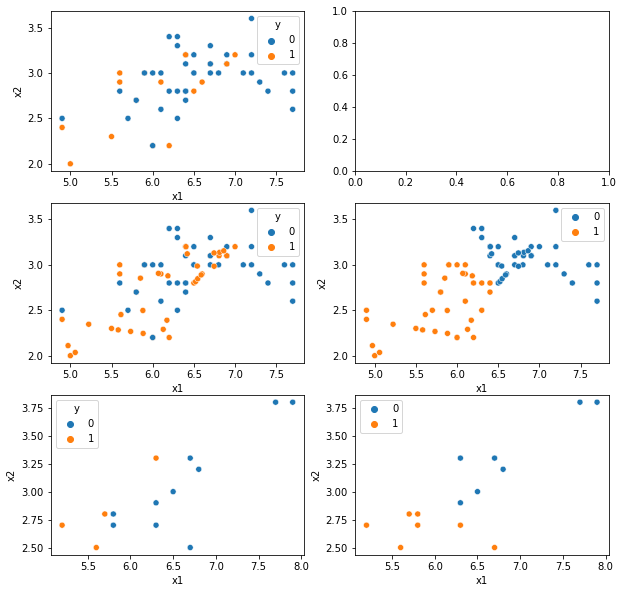

In [26]:
fig,ax = plt.subplots(3,2, figsize=(10,10))
sns.scatterplot(x='x1', y='x2', data=train, hue='y', ax=ax[0,0])
sns.scatterplot(x='x1', y='x2', data=sampled_df, hue='y', ax=ax[1,0])
sns.scatterplot(x='x1', y='x2', data=sampled_df, hue=pred_train, ax=ax[1,1])
sns.scatterplot(x='x1', y='x2', data=test, hue='y', ax=ax[2,0])
sns.scatterplot(x='x1', y='x2', data=test, hue=pred_test, ax=ax[2,1])
plt.show()

### ADASYN

In [28]:
sampler = ADASYN(random_state=RAND)
X_sampled, y_sampled = sampler.fit_resample(train[['x1', 'x2']], train['y'])
sampled_df = pd.concat([X_sampled, y_sampled], axis=1)

In [29]:
model = LogisticRegression(penalty='none')
model.fit(sampled_df[['x1', 'x2']], sampled_df['y'])
pred_test = model.predict(test[['x1', 'x2']])
pred_train = model.predict(sampled_df[['x1', 'x2']])
test_score = model.predict_proba(test[['x1', 'x2']])[:,1]
train_score = model.predict_proba(sampled_df[['x1', 'x2']])[:,1]

evals_df = pd.concat([evals_df, 
                      pd.DataFrame([['ADASYN', 
                                     mean_absolute_error(sampled_df['y'], train_score),
                                     f1_score(sampled_df['y'].astype('float64'), pred_train), 
                                     mean_absolute_error(test['y'], test_score), 
                                     f1_score(test['y'], pred_test)]], 
                                   columns=evals_df.columns)])

evals_df

,Method,Train MAE,Train f1,Test MAE,Test f1
0,None,0.347140,0.347826,0.320526,0.666667
0,Random Undersampling,0.386741,0.666667,0.387535,0.666667
0,Tomek Links,0.338999,0.518519,0.309594,0.750000
0,Condensed Nearest Neighbour,0.454197,0.551724,0.394890,0.666667
0,One-Sided Selection,0.338796,0.538462,0.307872,0.666667
0,Neighbourhood Cleaning Rule,0.236366,0.866667,0.436813,0.461538
0,Random Over Sampler,0.423196,0.605263,0.386947,0.600000
0,SMOTE,0.424831,0.589744,0.391171,0.545455
0,ADASYN,0.426340,0.589744,0.388023,0.545455


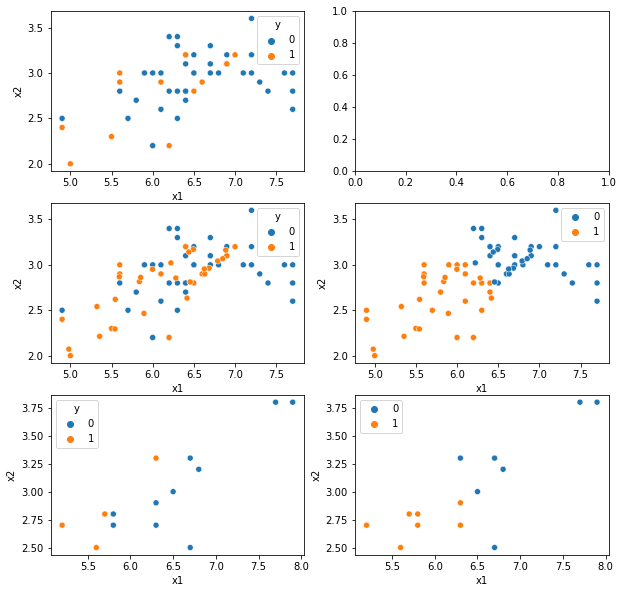

In [30]:
fig,ax = plt.subplots(3,2, figsize=(10,10))
sns.scatterplot(x='x1', y='x2', data=train, hue='y', ax=ax[0,0])
sns.scatterplot(x='x1', y='x2', data=sampled_df, hue='y', ax=ax[1,0])
sns.scatterplot(x='x1', y='x2', data=sampled_df, hue=pred_train, ax=ax[1,1])
sns.scatterplot(x='x1', y='x2', data=test, hue='y', ax=ax[2,0])
sns.scatterplot(x='x1', y='x2', data=test, hue=pred_test, ax=ax[2,1])
plt.show()